In [883]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Reading  the Data

In [1022]:
data = pd.read_csv(r'I:\Python\dataSet\ml\US Accidents\US_Accidents_Dec21_updated.csv')
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# Preprocessing Data

## Get Columns of Data

In [1023]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Show Information about Data

In [1024]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## Outliers
*  Get the int data type columns

In [1025]:
cols = []
for col in data.columns:
    if(data[col].dtype == np.float64):
        cols.append(col)
cols

['Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [1026]:
# find the outlier data 
def find_outlier(column):
    number_cols_ph = data[column].count()
    first_quartile = np.quantile(data[column], 0.25)
    third_quartile = np.quantile(data[column], 0.75)
    IQR = third_quartile - first_quartile
    min_outlier = first_quartile - (1.5 * IQR)
    max_outlier = third_quartile + (1.5 * IQR)
    print(f'the data less than {min_outlier} and more than {max_outlier} is the outlier data')
    return min_outlier, max_outlier

# remove the outlier data 
def remove_outlier(column):
    min_outlier, max_outlier = find_outlier(column)
    count_min = data[column].loc[data[column]<min_outlier].count()
    count_max = data[column].loc[data[column]>max_outlier].count()
    data[column].loc[data[column]<min_outlier] = np.nan
    data[column].loc[data[column]>max_outlier] = np.nan
    count = count_min + count_max
    return count

In [1027]:
for col in cols:
    find_outlier(col)
    count_of_liers = remove_outlier(col) 
    print(count_of_liers) 

the data less than 23.372570500000002 and more than 50.2328465 is the outlier data
the data less than 23.372570500000002 and more than 50.2328465 is the outlier data
0
the data less than -174.52413475 and more than -23.881408750000013 is the outlier data


C:\Users\Mohamed Hamde\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


the data less than -174.52413475 and more than -23.881408750000013 is the outlier data
0
the data less than 23.37412112499999 and more than 50.23320612500001 is the outlier data
the data less than 23.37412112499999 and more than 50.23320612500001 is the outlier data
0
the data less than -174.52325237500006 and more than -23.883461374999932 is the outlier data
the data less than -174.52325237500006 and more than -23.883461374999932 is the outlier data
0
the data less than -1.016 and more than 1.832 is the outlier data
the data less than -1.016 and more than 1.832 is the outlier data
279790
the data less than nan and more than nan is the outlier data
the data less than nan and more than nan is the outlier data
0
the data less than nan and more than nan is the outlier data
the data less than nan and more than nan is the outlier data
0
the data less than nan and more than nan is the outlier data
the data less than nan and more than nan is the outlier data
0
the data less than nan and more 

## Check the null values

In [1028]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)              279790
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [1029]:
data.dropna(inplace=True)

In [1030]:
data.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [1031]:
data.drop('Turning_Loop', axis=1, inplace = True)

## Check the duplicated values

In [1032]:
data.duplicated().sum()

0

In [1033]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,Closed between Willshire and US-33/Rockford Rd...,...,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143,41.84149,-80.11099,0.824,Between Irish Rd and Blystone Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,At I-490/Exit 161 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
89,A-90,2,2016-02-11 07:20:03,2016-02-11 13:20:03,38.33667,-81.65623,38.33614,-81.65623,0.037,Between Smith Rd and Tennis Club Rd - Accident.,...,False,False,False,False,False,False,Night,Day,Day,Day
90,A-91,2,2016-02-11 07:20:03,2016-02-11 13:20:03,38.33614,-81.65623,38.33667,-81.65623,0.037,Between Tennis Club Rd and Smith Rd - Accident.,...,False,False,False,False,False,False,Night,Day,Day,Day


In [1034]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

In [1035]:
data['year'] = data['Start_Time'].dt.year
data['month'] = data['Start_Time'].dt.month
data['day'] = data['Start_Time'].dt.day

data['hour'] = data['Start_Time'].dt.hour
data['minute'] = data['Start_Time'].dt.minute

# Exploratory Data Analysis

## Sample Size
* We will check if we choose perfect sample size from data or not?

In [1036]:
sample_data = data['Severity'].sample(n=400, random_state = 1998)

* Sample mean

In [1037]:
sample_mean =  sample_data.mean()

* Data mean

In [1038]:
data['Severity'].mean()

2.059238962559429

* Confidence Interval

In [1039]:
ci = stats.t.interval(alpha= 0.95, df=len(sample_data)-1, loc=sample_mean, scale=stats.sem(sample_data))
print(f'95% of confidence interval of mean is between {ci}')

95% of confidence interval of mean is between (2.007130724042065, 2.0578692759579353)


*  Check another column but it is categorical column.

In [1040]:
proportion_R = (data['Side'] == 'R').mean()
proportion_L = (data['Side'] == 'L').mean()
z_critical = stats.norm.ppf(0.975)
n = len(sample_data)
print(proportion_R)

0.5599766279941333


In [1041]:
confidence_interval = stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  proportion_R,     # Point estimate of proportion
                   scale = np.sqrt((proportion_R*(1-proportion_R))/n))  # Scaling factor
print(f'There is a 95% chance that the true population proportion lies somewhere between  {confidence_interval}')

There is a 95% chance that the true population proportion lies somewhere between  (0.5113313243864774, 0.6086219316017891)


* As we can see this size of sample is so good..

In [1042]:
data = data.sample(n=400)

## What is the most year has accidents?

<AxesSubplot:xlabel='year', ylabel='count'>

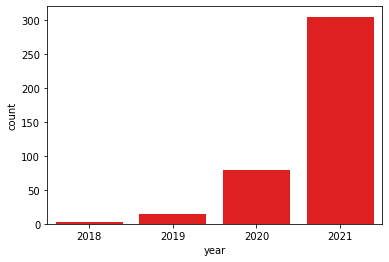

In [1043]:
sns.countplot(x=data.year, color='red')

## What is the most month has accidents?

In [1044]:
count_month = data['month'].value_counts().reset_index()
count_month.columns = ['month', 'count']

<AxesSubplot:xlabel='month', ylabel='count'>

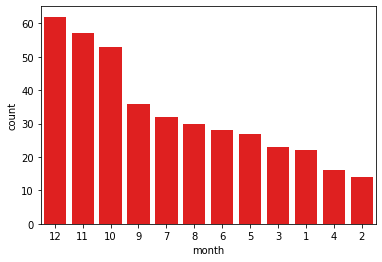

In [1045]:
sns.countplot(x=data.month, color='red', order=count_month.month)

## What is the most day has accidents?

In [1046]:
count_day = data['day'].value_counts().reset_index()
count_day.columns = ['day', 'count']

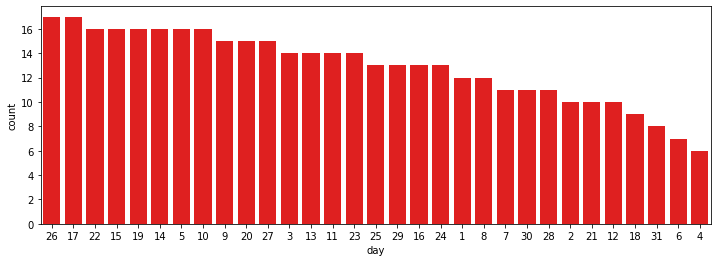

In [1047]:
plt.figure(figsize=(12,4))
sns.countplot(x='day', data=data,  color='red', order=count_day.day)
plt.show()

## 2021

### What is the most month has accidents in 2021? 

In [1048]:
data_2021 = data[data['year'] == 2021]

In [1049]:
count = 1
for i in range(len(data_2021)):
    data_2021['count'] = count

C:\Users\Mohamed Hamde\AppData\Local\Temp\ipykernel_19880\789628173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['count'] = count


In [1050]:
count_month_2021 = data_2021['month'].value_counts().reset_index()
count_month_2021.columns = ['month', 'count']

<AxesSubplot:xlabel='month', ylabel='count'>

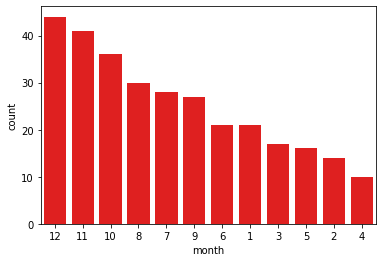

In [1051]:
sns.countplot(x=data_2021.month, color='red', order=count_month_2021.month)

### What is the probability of happing accidents 'range (20, 30 )'  in one month?

In [1052]:
mu = count_month_2021['count'].mean()
mu

25.416666666666668

[0.04763533 0.05765387 0.06660769 0.07360633 0.07795114 0.07925033
 0.07747228 0.07292915 0.06620057 0.05802061]


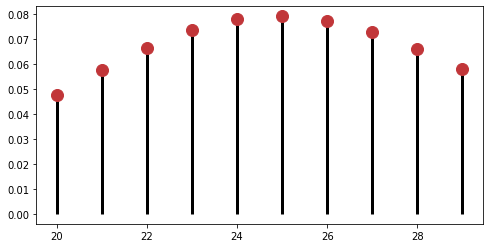

In [1063]:
plt.figure(figsize=(8,4))
x = np.arange(20, 30)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most day has accidents in 2021?

In [1064]:
count_day_2021 = data_2021['day'].value_counts().reset_index()
count_day_2021.columns = ['day', 'count']

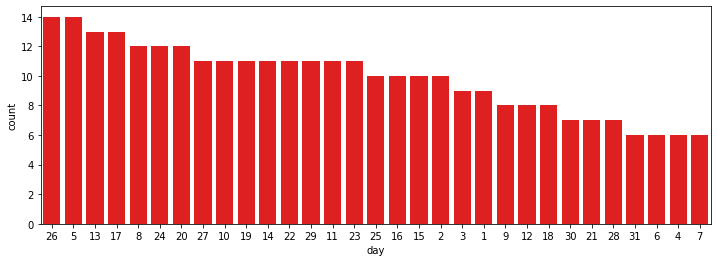

In [1065]:
plt.figure(figsize=(12,4))
sns.countplot(x='day', data=data_2021,  color='red', order=count_day_2021.day)
plt.show()

### Count of accidents on everyday in month.

In [1066]:
count_day_month_2021 = data_2021[['month','day']].value_counts().reset_index()
count_day_month_2021.columns = ['month', 'day', 'count']
count_day_month_2021.sort_values('month')

,month,day,count
65,1,22,2
29,1,1,2
66,1,28,2
74,1,5,2
104,1,29,1
...,...,...,...
121,12,9,1
122,12,8,1
123,12,6,1
127,12,1,1


### Count of accidents on everyday in month by weather condition.

In [1067]:
count_day_month_weather_condition_2021 = data_2021.groupby(['month', 'day', 'Weather_Condition', 'Wind_Direction'])['count'].sum().reset_index()
count_day_month_weather_condition_2021.head()   

,month,day,Weather_Condition,Wind_Direction,count
0,1,1,Cloudy,ENE,1
1,1,1,Fair,N,1
2,1,2,Mostly Cloudy,W,1
3,1,5,Cloudy,CALM,1
4,1,5,Fair,CALM,1


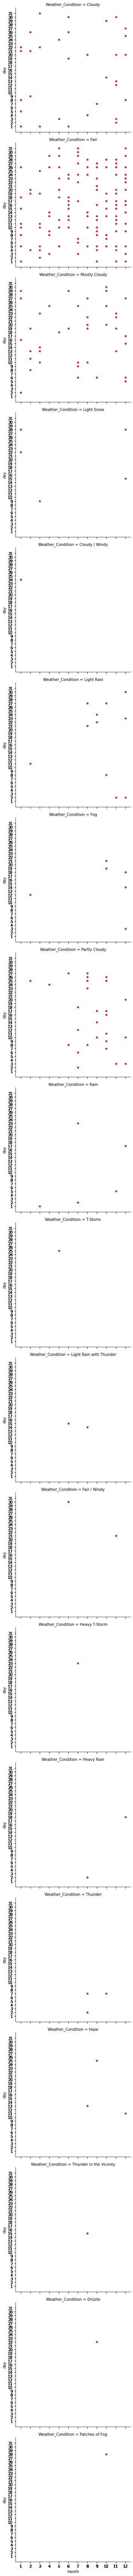

In [1068]:
sns.relplot(y='day', x='month', data = count_day_month_weather_condition_2021, kind='scatter', row='Weather_Condition')
plt.xticks(count_day_month_weather_condition_2021.month)
plt.yticks(count_day_month_weather_condition_2021.day)
plt.show()

### Count of accidents on everyday in month by wind direction.

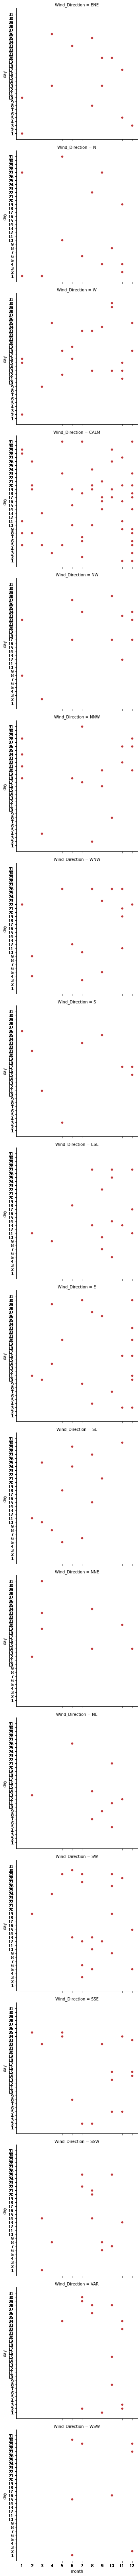

In [1069]:
sns.relplot(y='day', x='month', data =count_day_month_weather_condition_2021, kind='scatter',row='Wind_Direction')
plt.xticks(count_day_month_weather_condition_2021.month)
plt.yticks(count_day_month_weather_condition_2021.day)
plt.show()

### What is the probability of happing accidents 'range (1 : 10 )' in one day?

In [1070]:
mu = count_day_2021['count'].mean()
mu   

9.838709677419354

[0.11071134 0.1901347  0.21769045 0.18692985 0.12841268 0.0735116
 0.03607091 0.01548697 0.00591049]


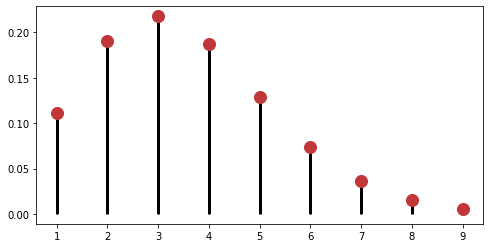

In [1132]:
plt.figure(figsize=(8,4))
x = np.arange(1, 10)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most city has accidents in 2021?

In [1086]:
count_city_2021 = data_2021['City'].value_counts().reset_index()
count_city_2021.columns = ['city', 'count']
count_city_2021

,city,count
0,Miami,25
1,Orlando,15
2,Los Angeles,8
3,Houston,8
4,Dallas,5
...,...,...
197,Lutz,1
198,Saint Cloud,1
199,Laurens,1
200,Helena,1


* In Miami, one of the city's major cultural events of the year, Art Basel Miami Beach, takes place in early December, and, of course, the Christmas season is hectic.

In [1087]:
count = 1
for i in range(len(data_2021)):
    data_2021['count'] = count

C:\Users\Mohamed Hamde\AppData\Local\Temp\ipykernel_19880\789628173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['count'] = count


### What is the time that accidents are increasing? 

In [1088]:
count_hour_2021 = data_2021['hour'].value_counts().sort_values(ascending=False).reset_index()
count_hour_2021.columns = ['hour', 'count']

<AxesSubplot:xlabel='hour', ylabel='count'>

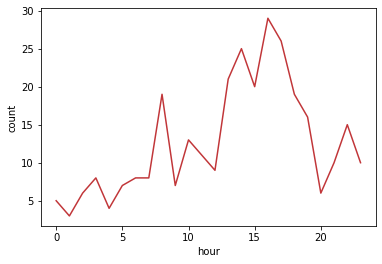

In [1089]:
sns.lineplot(x='hour', y='count', data=count_hour_2021)

### What is the most hour that has the most number of accidents and in which city? 

In [1090]:
count_accidents_hour_city_2021 = data_2021.groupby(['City', 'hour'])['count'].sum().reset_index().sort_values('count', ascending=False)

In [930]:
# data_most_accident_hour = df[(df['hour'] >= 10) & (df['hour'] <=18)].sort_values('hour')
# data_most_accident_hour.head()

In [1095]:
count_accidents_hour_city_2021['City'].value_counts().nlargest(4)

Miami          11
Orlando        10
Los Angeles     6
Houston         6
Name: City, dtype: int64

In [1092]:
data_most_city_accident_hour = count_accidents_hour_city_2021[count_accidents_hour_city_2021['City'].isin(['Miami', 'Los Angeles', 'Orlando', 'Houston'])]

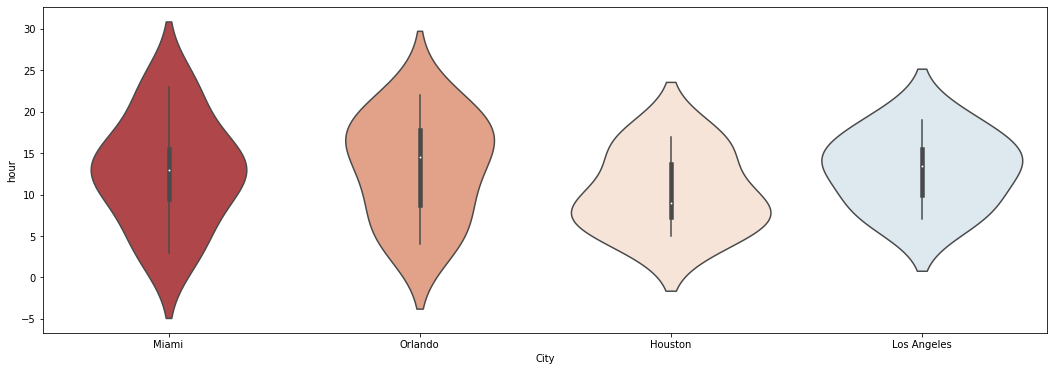

In [1093]:
plt.figure(figsize=(18,6))
sns.violinplot(x=data_most_city_accident_hour.City, y=data_most_city_accident_hour.hour)
plt.show()

### What is the probability of happing accidents 'range (10 : 20 )' in one hour?

In [1096]:
mu = count_hour_2021['count'].mean()
mu

12.708333333333334

[0.09161443 0.10584243 0.11209008 0.10957524 0.09946562 0.08426948
 0.06693279 0.05003554 0.03532602 0.02362815]


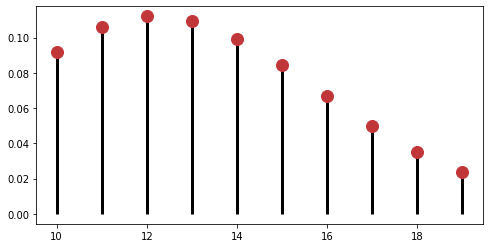

In [1099]:
plt.figure(figsize=(8,4))
x = np.arange(10, 20)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most street has the most number of accidents?

In [1100]:
data_2021['Street'].value_counts().nlargest(1)

 S Dixie Hwy    5
Name: Street, dtype: int64

##  2020

### What is the most month has accidents in 2020?

In [1101]:
data_2020 = data[data['year'] == 2020]

In [1102]:
count = 1
for i in range(len(data_2020)):
    data_2020['count'] = count

C:\Users\Mohamed Hamde\AppData\Local\Temp\ipykernel_19880\2019212970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['count'] = count


In [1103]:
count_month_2020 = data_2020['month'].value_counts().reset_index()
count_month_2020.columns = ['month', 'count']

<AxesSubplot:xlabel='month', ylabel='count'>

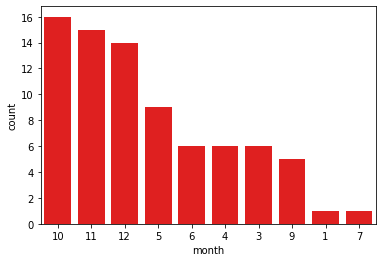

In [1104]:
sns.countplot(x=data_2020.month, color='red', order=count_month_2020.month)

### What is the probability of happing accidents 'range (5 : 15 )' in one month?

In [1105]:
mu = count_month_2020['count'].mean()
mu

7.9

[0.09506657 0.12517098 0.14126439 0.13949858 0.12244876 0.09673452
 0.06947297 0.04573637 0.02779364 0.01568356]


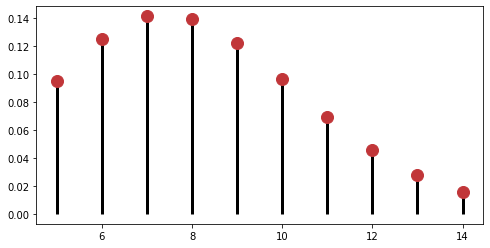

In [1107]:
plt.figure(figsize=(8,4))
x = np.arange(5, 15)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most day has accidents in 2020?

In [1108]:
count_day_2020 = data_2020['day'].value_counts().reset_index()
count_day_2020.columns = ['day', 'count']

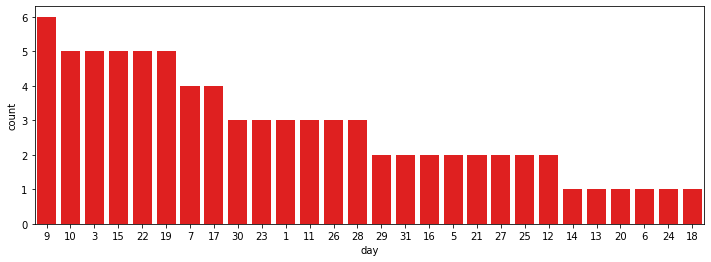

In [1109]:
plt.figure(figsize=(12,4))
sns.countplot(x='day', data=data_2020,  color='red', order=count_day_2020.day)
plt.show()

### What is the probability of happing accidents 'range (1 : 8 )' in one day?

In [1110]:
mu = count_day_2020['count'].mean()
mu

2.8214285714285716

[0.16793383 0.23690666 0.22280507 0.15715715 0.08868153 0.04170144
 0.01680823]


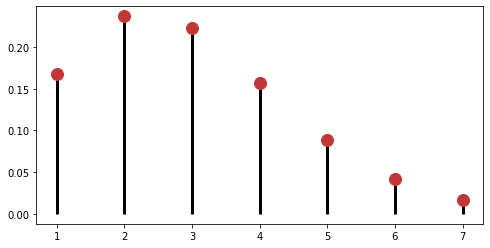

In [1111]:
plt.figure(figsize=(8,4))
x = np.arange(1, 8)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most city has accidents in 2020?

In [1114]:
count_city_2020 = data_2020['City'].value_counts().reset_index()
count_city_2020.columns = ['city', 'count']
count_city_2020

,city,count
0,Miami,7
1,Rochester,3
2,Bakersfield,3
3,Houston,3
4,York,2
...,...,...
60,Valley Center,1
61,Elma,1
62,Greensboro,1
63,Landrum,1


* In Miami, one of the city's major cultural events of the year, Art Basel Miami Beach, takes place in early December, and, of course, the Christmas season is hectic.

### What is the time that accidents are increasing?

In [1115]:
count_hour_2020 = data_2020['hour'].value_counts().sort_values(ascending=False).reset_index()
count_hour_2020.columns = ['hour', 'count']

<AxesSubplot:xlabel='hour', ylabel='count'>

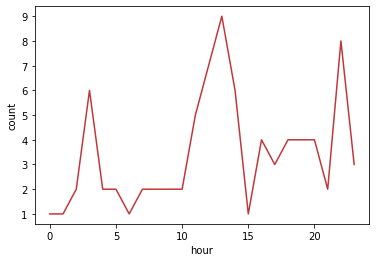

In [1116]:
sns.lineplot(x='hour', y='count', data=count_hour_2020)

### What is the most hour that has the most number of accidents and in which city? 

In [1117]:
count_accidents_hour_city_2020 = data_2020.groupby(['City', 'hour'])['count'].sum().reset_index().sort_values('count', ascending=False)

In [952]:
# data_most_accident_hour = df[(df['hour'] >= 0) & (df['hour'] <=23)].sort_values('hour')

In [1120]:
count_accidents_hour_city_2020['City'].value_counts().nlargest(4)

Miami          5
Houston        3
Bakersfield    3
Rochester      3
Name: City, dtype: int64

In [1121]:
data_most_city_accident_hour = count_accidents_hour_city_2020[count_accidents_hour_city_2020['City'].isin(['Miami', 'Houston', 'Bakersfield', 'Rochester'])]

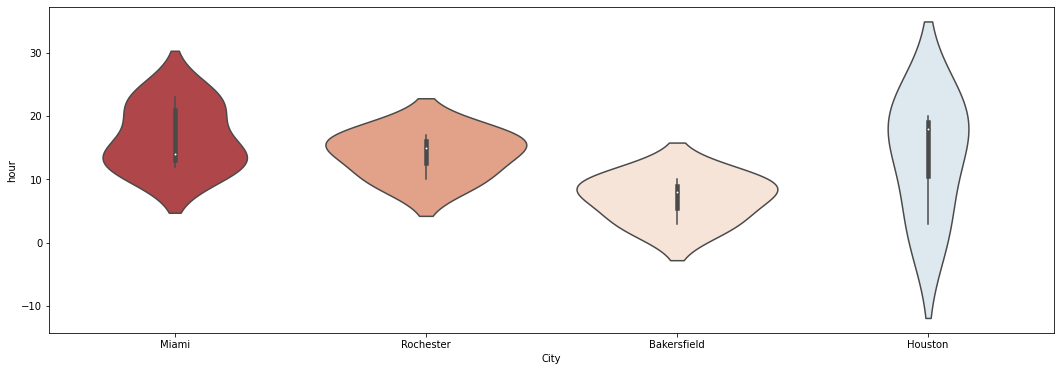

In [1122]:
plt.figure(figsize=(18,6))
sns.violinplot(x=data_most_city_accident_hour.City, y=data_most_city_accident_hour.hour)
plt.show()

### What is the probability of happing accidents 'range (1 : 8 )' in one hour?

In [1123]:
mu = count_hour_2020['count'].mean()
mu

3.4347826086956523

[0.11071134 0.1901347  0.21769045 0.18692985 0.12841268 0.0735116
 0.03607091]


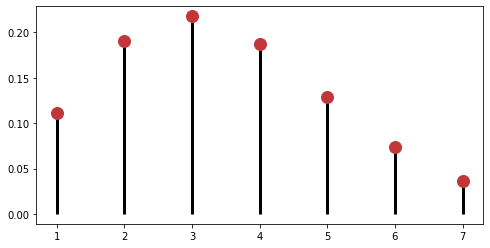

In [1124]:
plt.figure(figsize=(8,4))
x = np.arange(1, 8)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

### What is the most street has the most number of accidents?

In [1134]:
data_2020['Street'].value_counts().nlargest(1)

 W Flagler St    2
Name: Street, dtype: int64

### Count of accidents on everyday in month.

In [1127]:
count_day_month_weather_condition_2021 = data_2020.groupby(['month', 'day', 'Weather_Condition', 'Wind_Direction'])['count'].sum().reset_index()
count_day_month_weather_condition_2021.head()

,month,day,Weather_Condition,Wind_Direction,count
0,1,9,Cloudy,NW,1
1,3,9,Mostly Cloudy,S,1
2,3,21,Mostly Cloudy,NNE,1
3,3,23,Light Rain,SE,1
4,3,23,Light Rain,SSE,1


### Count of accidents on everyday in month by weather condition.

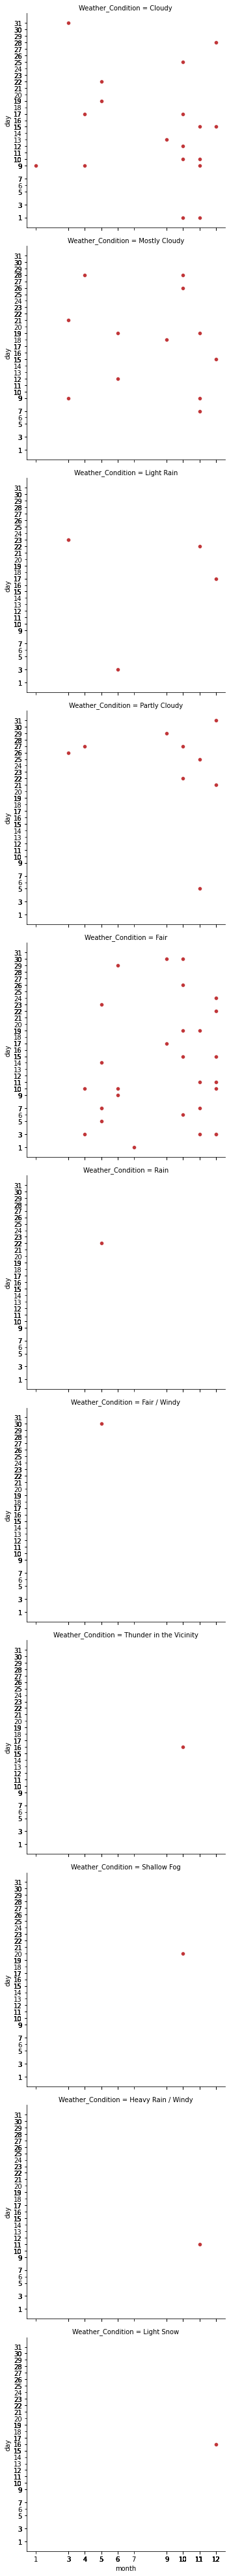

In [1128]:
sns.relplot(y='day', x='month', data =count_day_month_weather_condition_2021, kind='scatter', row='Weather_Condition')
plt.xticks(count_day_month_weather_condition_2021.month)
plt.yticks(count_day_month_weather_condition_2021.day)
plt.show()

### Count of accidents on everyday in month by wind direction.

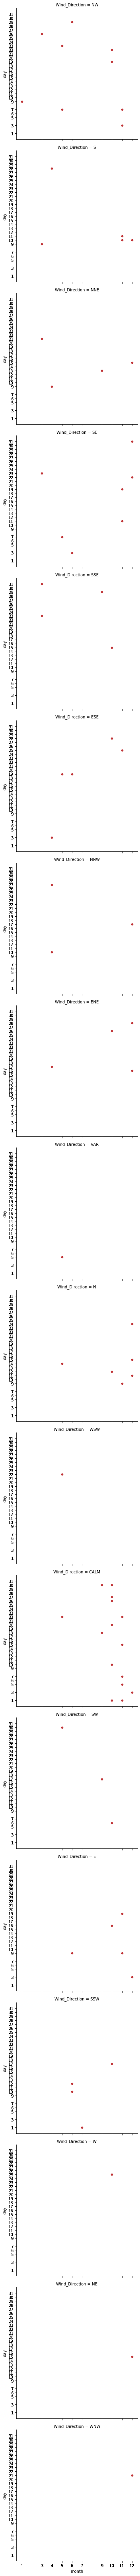

In [1129]:
sns.relplot(y='day', x='month', data = count_day_month_weather_condition_2021, kind='scatter',row='Wind_Direction')
plt.xticks(count_day_month_weather_condition_2021.month)
plt.yticks(count_day_month_weather_condition_2021.day)
plt.show()